<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Exponential-Exponential-Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
k = 5

Generate $k$ $\lambda$s: $\lambda_1, \dots, \lambda_k$.

In [ ]:
lambda_list = np.random.uniform(7,9,k)
lambda_list

array([7.04061456, 8.44319485, 8.7226834 , 7.49492496, 8.78709396])

For $X\sim Exp(\lambda_j)$, we have
\begin{eqnarray*}
f(x)=\lambda_j e^{-\lambda_j x }, \quad x>0.
\end{eqnarray*}

In [8]:
def ET_m(m, lambda_list, delta, eta):
    def Generate_Z(m, lambda_list):
        sum_of_x_list = []
        for i in range(len(lambda_list)):
            sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, lambda_list, delta, eta):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.exponential(1/delta)
        w = np.random.exponential(1/eta)
        Z_m = Generate_Z(m, lambda_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, lambda_list)
            y = np.random.exponential(1/delta)
            w = np.random.exponential(1/eta)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, lambda_list, delta, eta)[0]
            W_0 += T_m(i+1, lambda_list, delta, eta)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.04289788976108199
0.14380982554651278
0.2800322532343368
0.42094218094918195
0.5854037548699027
0.7556434150344148
0.9397017321358627
1.116200090878013
1.3318599647076854
1.5360184223618125
1.7605685626839453
1.9771020438053777
2.236661645484661
2.4726027047771306
2.7061874754175346
2.965634345808801
3.2371883427150223
3.5727893897245133
3.834719720306134
4.158843859689515
4.50115801094188
4.789136613238317
5.167799020804535
5.5232563718580865
5.902947488223136
6.29204140949097
6.683180096785993
7.165686921835108
7.524125882975133
7.928421318943913
8.51799500786062
8.9045003925887
9.40500304688148
9.941207531317987
10.445558614272095
11.097710973494062
11.577371170308897
12.258663818752622
12.96460075358218
13.58145313652574


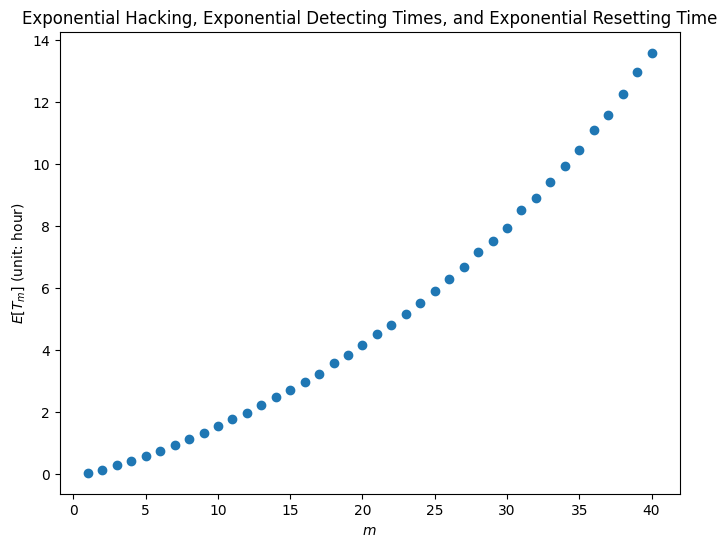

In [9]:
m = 40
delta = 1/3
eta = 1/2
ET_m, sum_w = ET_m(m, lambda_list, delta, eta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Exponential Hacking, Exponential Detecting Times, and Exponential Resetting Time')
plt.show()

In [10]:
R = [1.2*c for c in range(1, m+1)]
C_2 = [.5*c**1.3 for c in range(1, m+1)]
C_1 = [.22*c**.8  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

6 0.8720465527195187


array([ 0.33190885,  0.44825856,  0.70756658,  0.79570187,  0.84162864,
        0.87204655,  0.85838075,  0.80808808,  0.75399443,  0.65714596,
        0.59575341,  0.43251834,  0.26904107,  0.08416128, -0.11856687,
       -0.30624751, -0.52771607, -0.78002245, -1.04347742, -1.30657174,
       -1.59156771, -1.88914929, -2.19392684, -2.52059122, -2.85470415,
       -3.20226048, -3.55801568, -3.93341613, -4.29991059, -4.68644069,
       -5.11928786, -5.51928069, -5.94915507, -6.3816856 , -6.80985388,
       -7.26916492, -7.69031755, -8.20609824, -8.72016129, -9.21283629])

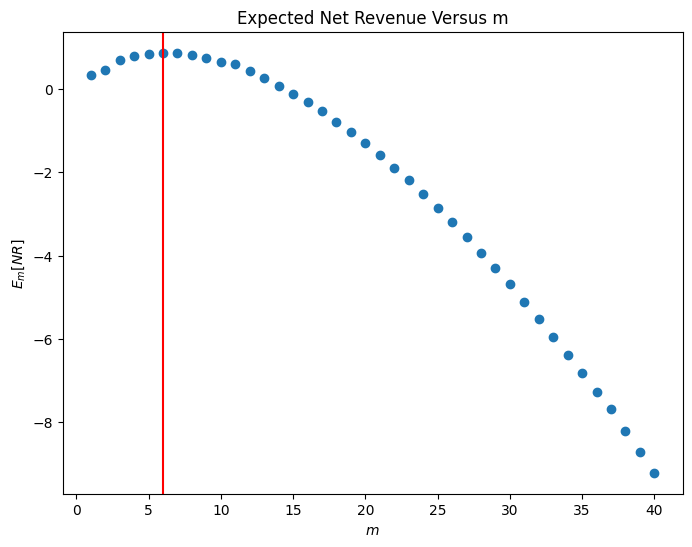

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus m')
plt.show()